Title :
Data Analysis & Visualization

Description:

You are provided with a healthcare dataset from which you need to extract meaningful insights. Perform a complete tabular and visual analysis, and identify relationships between different features of the dataset. After completing the analysis and visualizations, write a short analytical report in your own words summarizing your findings about the dataset. Dataset link given below :
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# **Analysis on Health Care Dataset**
# **Date: 9th November 2025**
# **Roll: 447408**
# **Technologies Used: Python, NumPy, Pandas, Matplotlib, Seaborn**

## -o) Import libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings("ignore")
# matplotlib font warnings specific hide karne ke liye:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## -o) Load dataset

In [46]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")


## -o) Basic Information for Understanding Data

In [47]:
# Check Data Set Loaded Successfully!
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
# Inspect data size, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [49]:
# Check Stats of Data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [50]:
# Dulpiate Data
print('Duplicate Data : ',df.duplicated().sum())


Duplicate Data :  0


In [51]:
# Shape Of Data
print(df.shape)

(5110, 12)



## -o) Data Cleaning

In [52]:
# o) Data Duplicacy
print('\nOverall Duplicate Data Count : ',df.duplicated().sum()) # no data duplicacy
print('\nSame Id Record Count : ',df['id'].duplicated().sum()) # no repeated id record



Overall Duplicate Data Count :  0

Same Id Record Count :  0


In [53]:
# o) Data Uniqueness
for i in df.columns:
    print(f'Colume Name : {i}',f'Uniqueness of {i} : {df[i].nunique()}',sep='\n')
    print(df[i].unique(),end='\n\n')

Colume Name : id
Uniqueness of id : 5110
[ 9046 51676 31112 ... 19723 37544 44679]

Colume Name : gender
Uniqueness of gender : 3
['Male' 'Female' 'Other']

Colume Name : age
Uniqueness of age : 104
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+0

In [84]:
print('Other gender count : ',df[df['gender'] == 'Other']['gender'].count())
df = df.drop(df[df['gender'] == 'Other'].index , axis=0)

Other gender count :  0


In [54]:
# o) Data Skewness
for i in df.select_dtypes(include='number').columns:
    print(f'Colume Name : {i}',f'Skewness of {i} : {df[i].skew()}',sep='\n')
    if df[i].skew() < 0.5:
        print(f'{i} is left skewed\n')
    elif df[i].skew() > 0.5:
        print(f'{i} is Right skewed\n')
    else:
        print(f'{i} is symmetric\n')

Colume Name : id
Skewness of id : -0.019912979190701046
id is left skewed

Colume Name : age
Skewness of age : -0.1370593225984694
age is left skewed

Colume Name : hypertension
Skewness of hypertension : 2.7153916581245294
hypertension is Right skewed

Colume Name : heart_disease
Skewness of heart_disease : 3.947243966661894
heart_disease is Right skewed

Colume Name : avg_glucose_level
Skewness of avg_glucose_level : 1.5722838665030459
avg_glucose_level is Right skewed

Colume Name : bmi
Skewness of bmi : 1.0553402052962912
bmi is Right skewed

Colume Name : stroke
Skewness of stroke : 4.193284486071313
stroke is Right skewed



BMI Colume

We want to fill the null values in the BMI column. We usually use either the mean or the median for this, but since the BMI column contains outliers, the data is skewed. Because of that, using the median is the better choice.

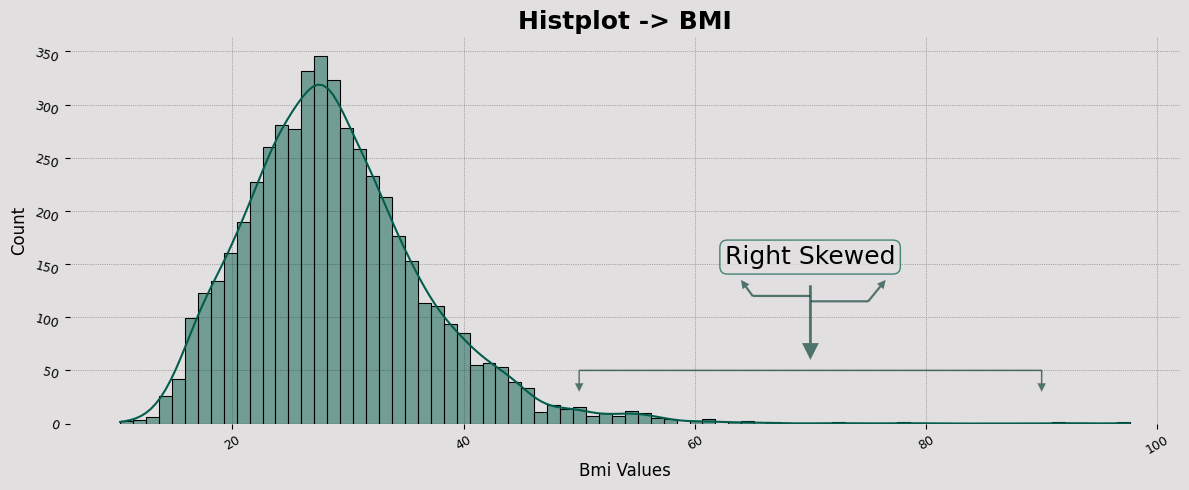

In [55]:
fig, ax = plt.subplots(figsize=(12,5),facecolor="#E1DFDF")
ax.set_facecolor("#E1DFDF")  # Inner graph area ka color
plt.ticklabel_format(style='plain', axis='y')
plt.title('Histplot -> BMI',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
plt.xlabel('Bmi Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
plt.ylabel('Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
sns.histplot(data=df , x = 'bmi', kde = True , color = "#045C4CFF" , alpha = 0.5)
# sns.kdeplot(data=df, x='bmi', color='red', linewidth=2)
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)

plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
plt.text(62.6,150,'Right Skewed',fontsize = 18,fontfamily = 'cursive',bbox = {
    'facecolor' : '#E1DFDF', 'edgecolor' : "#045C4CFF",'alpha' : 0.7,'linewidth' : 1,'boxstyle': 'round,pad=0.2,rounding_size=0.3','facecolor':'#E1DFDF'
})
plt.annotate('' ,xy=(50,50) , xytext=(90,50) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 0.1,'headlength': 0.1,'width': 1})
plt.annotate('' ,xy=(50,30) , xytext=(50,50) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 6,'headlength': 6,'width': 1})
plt.annotate('' ,xy=(90,30) , xytext=(90,50) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 6,'headlength': 6,'width': 1})
plt.annotate('' ,xy=(70,60) , xytext=(70,130) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 12,'headlength': 12,'width': 2})
plt.annotate('' ,xy=(70,120) , xytext=(65,120) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 0.1,'headlength': 0.1,'width': 1.5})
plt.annotate('' ,xy=(70,115) , xytext=(75,115) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 0.1,'headlength': 0.1,'width': 1.5})


plt.annotate('' ,xy=(64,135) , xytext=(65,120) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 6,'headlength': 6,'width': 1.5})
plt.annotate('' ,xy=(76.5,135) , xytext=(75,115) ,arrowprops={
    'facecolor' : "#013A2FA7", 'shrink' : 0 , 'edgecolor' : 'grey', 'edgecolor' : 'grey','linewidth' : 0.1 , 'headwidth': 6,'headlength': 6,'width': 1.5})

sns.despine(top=True, right=True,  left=True, bottom=True, trim=True)
plt.tight_layout()
plt.show() # Data is right skewed so we have to replace nulls with median value


In [56]:
print('Null Percentage of bmi colume : ',round((df['bmi'].isnull().sum() / df.shape[0]) * 100, 2))
df['bmi'] = df['bmi'].fillna(df['bmi'].median() , axis=0)
print('Null data count : ',df['bmi'].isnull().sum())

Null Percentage of bmi colume :  3.93
Null data count :  0


In [78]:
# first we have to remove outlier from the bmi column
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
print(f'q1 : {q1}',f'q2 : {q3}',sep='\n')
iqr = q3-q1
min_range = q1 - (1.5*iqr)
max_range = q3 + (1.5*iqr)
df = df[(df['bmi'] >= min_range) & (df['bmi'] <= max_range)]

q1 : 23.8
q2 : 32.4


In [79]:
print(df.shape)

(4920, 15)


In [82]:
print('Data count in the bmi column greater than 40 is : ',df[df['bmi'] > 40]['bmi'].count())

Data count in the bmi column greater than 40 is :  262


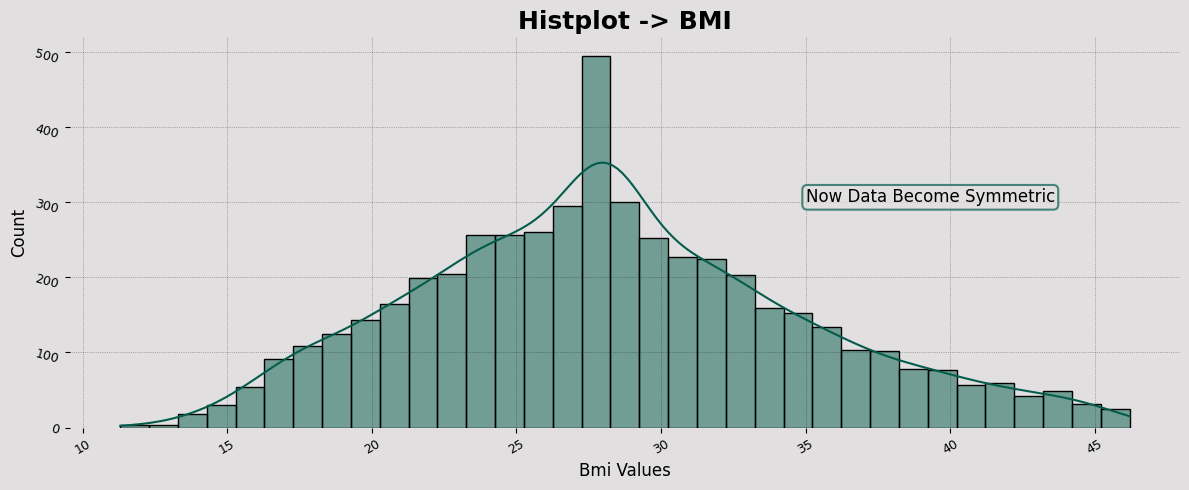

In [58]:
fig, ax = plt.subplots(figsize=(12,5),facecolor="#E1DFDF")
ax.set_facecolor("#E1DFDF")  # Inner graph area ka color
plt.ticklabel_format(style='plain', axis='y')
plt.title('Histplot -> BMI',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
plt.xlabel('Bmi Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
plt.ylabel('Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
sns.histplot(data=df , x = 'bmi', kde = True , color = "#045C4CFF" , alpha = 0.5)
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)
plt.text(35,300,'Now Data Become Symmetric',fontsize = 12,fontfamily = 'cursive',bbox = {
    'facecolor' : '#E1DFDF', 'edgecolor' : "#045C4CFF",'alpha' : 0.7,'linewidth' : 1.5,'boxstyle': 'round,pad=0.2,rounding_size=0.3','facecolor':'#E1DFDF'
})
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine(top=True, right=True, left=True, bottom=True, trim=True)
plt.tight_layout()
plt.show()

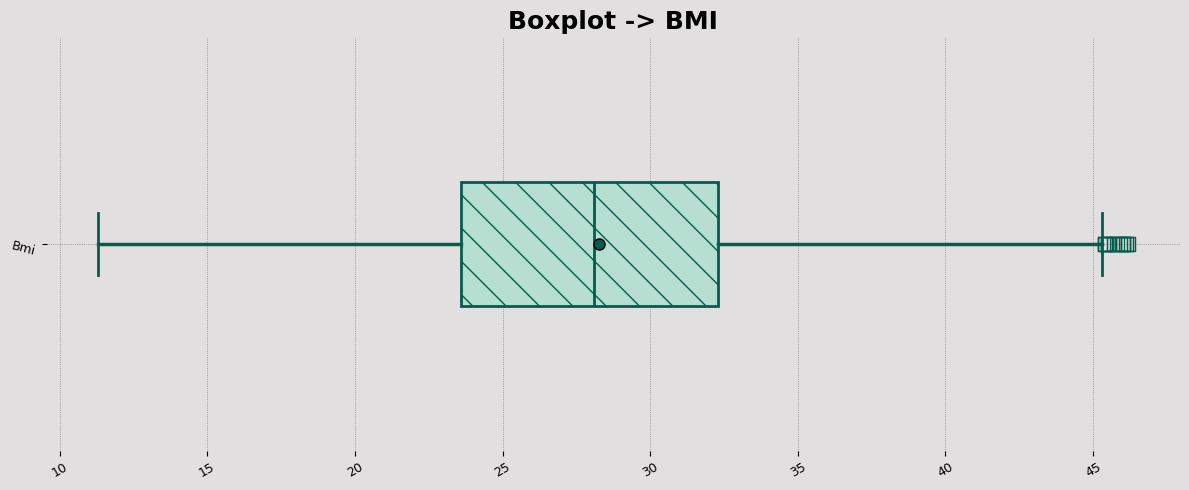

In [59]:
fig, ax = plt.subplots(figsize=(12,5),facecolor="#E1DFDF")
ax.set_facecolor("#E1DFDF")  # Inner graph area ka color
plt.ticklabel_format(style='plain', axis='y')
plt.title('Boxplot -> BMI',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
# plt.xlabel('Bmi Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
# plt.ylabel('Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
bp = plt.boxplot(
    df['bmi'],
    tick_labels=["Bmi"],
    widths=0.3,
    showmeans=True,
    vert=False,
    patch_artist=True,
    boxprops={'edgecolor':"#045C4CFF", 'linewidth':2, 'linestyle':':'},  # edgecolor instead of color
    capprops={'color':"#045C4CFF", 'linewidth':2},
    whiskerprops={'color':"#045C4CFF", 'linewidth':2.5},
    flierprops={'marker':'s','markeredgecolor':'#045C4CFF','markeredgewidth':0.9,'markersize':10},
    meanprops={'marker':'o','markerfacecolor':'#045C4CFF','markeredgecolor':'black','markersize':8},
    medianprops={'color':'#045C4CFF', 'linewidth':2},  # median line color + width
)

for box in bp['boxes']:
    box.set_facecolor("#B6DFD1")  # fill color
    box.set_hatch("\\")            # hatch pattern
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine(top=True, right=True, left=True, bottom=True, trim=True)
plt.tight_layout()
plt.show()

In [60]:
# o)  Ages
# Age column datatype float
df['age'] = df['age'].astype(int)
print(df['age'].dtype)

int64


In [61]:
# Age  for outlier checker
print(df['age'].sort_values(ascending=False).head(5))  # Maximum ages in order to understand

4164    82
1839    82
4763    82
56      82
4716    82
Name: age, dtype: int64


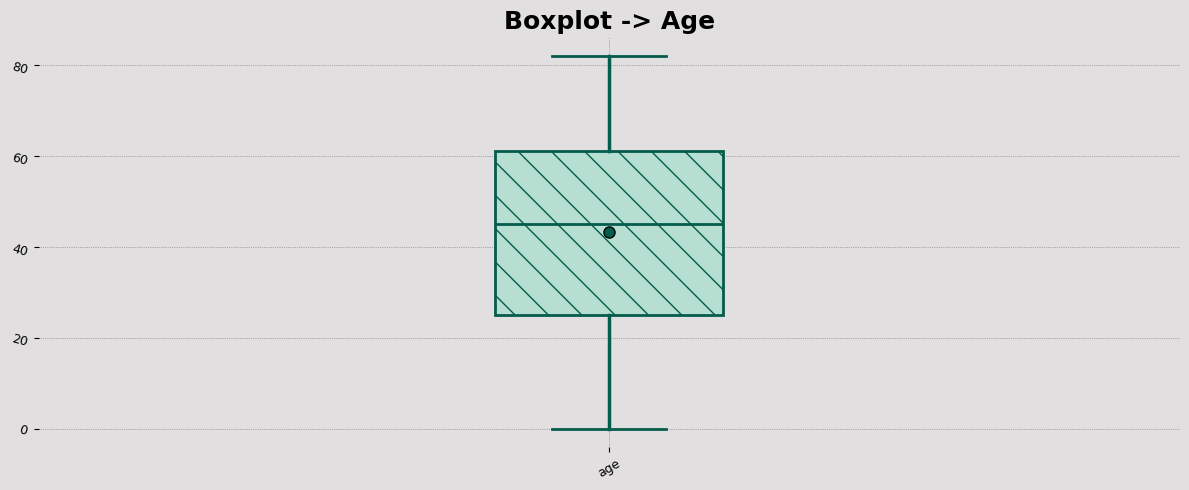

In [62]:

fig, ax = plt.subplots(figsize=(12,5),facecolor="#E1DFDF")
ax.set_facecolor("#E1DFDF")  # Inner graph area ka color
plt.ticklabel_format(style='plain', axis='y')
plt.title('Boxplot -> Age',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
# plt.xlabel('Bmi Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
# plt.ylabel('Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
bp = plt.boxplot(
    df['age'],
    tick_labels=["age"],
    widths=0.2,
    showmeans=True,
    # vert=False,
    patch_artist=True,
    boxprops={'edgecolor':"#045C4CFF", 'linewidth':2, 'linestyle':':'},  # edgecolor instead of color
    capprops={'color':"#045C4CFF", 'linewidth':2},
    whiskerprops={'color':"#045C4CFF", 'linewidth':2.5},
    flierprops={'marker':'s','markeredgecolor':'#045C4CFF','markeredgewidth':0.9,'markersize':10},
    meanprops={'marker':'o','markerfacecolor':'#045C4CFF','markeredgecolor':'black','markersize':8},
    medianprops={'color':'#045C4CFF', 'linewidth':2},  # median line color + width
)

for box in bp['boxes']:
    box.set_facecolor("#B6DFD1")  # fill color
    box.set_hatch("\\")            # hatch pattern
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine(top=True, right=True, left=True, bottom=True, trim=True)
plt.tight_layout()
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4984 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4984 non-null   int64  
 1   gender             4984 non-null   object 
 2   age                4984 non-null   int64  
 3   hypertension       4984 non-null   int64  
 4   heart_disease      4984 non-null   int64  
 5   ever_married       4984 non-null   object 
 6   work_type          4984 non-null   object 
 7   Residence_type     4984 non-null   object 
 8   avg_glucose_level  4984 non-null   float64
 9   bmi                4984 non-null   float64
 10  smoking_status     4984 non-null   object 
 11  stroke             4984 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 506.2+ KB


In [64]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [65]:
print('Numeric Date Description')
round(df.describe(),2)

Numeric Date Description


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4984.00,4984.00,4984.00,4984.00,4984.00,4984.00,4984.00
mean,36606.63,43.19,0.10,0.06,105.73,28.25,0.05
std,21150.80,22.81,0.29,0.23,44.83,6.63,0.22
min,67.00,0.00,0.00,0.00,55.12,11.30,0.00
25%,17807.50,25.00,0.00,0.00,77.20,23.60,0.00
50%,36964.50,45.00,0.00,0.00,91.84,28.10,0.00
75%,54805.50,61.00,0.00,0.00,113.76,32.30,0.00
max,72940.00,82.00,1.00,1.00,271.74,46.20,1.00


In [66]:
print('Data Shape : ',df.shape)

Data Shape :  (4984, 12)


In [67]:
print('Percentage of age having 0 is column : ',(df[df['age'] == 0]['age'].count() / df.shape[0])*100)

Percentage of age having 0 is column :  0.862760834670947


In [68]:
df = df.drop(df[df['age'] == 0].index , axis=0)
print('Count of 0 in age column : ',df[df['age'] == 0]['age'].count())

Count of 0 in age column :  0


In [69]:
print(df.shape)

(4941, 12)


In [70]:
#   avg_glucose_level
print(df['avg_glucose_level'].sort_values(ascending=False).head(5)) # Maximum avg_glucose_level in order to understand

193     271.74
1207    267.76
3088    267.61
4983    267.60
2462    266.59
Name: avg_glucose_level, dtype: float64


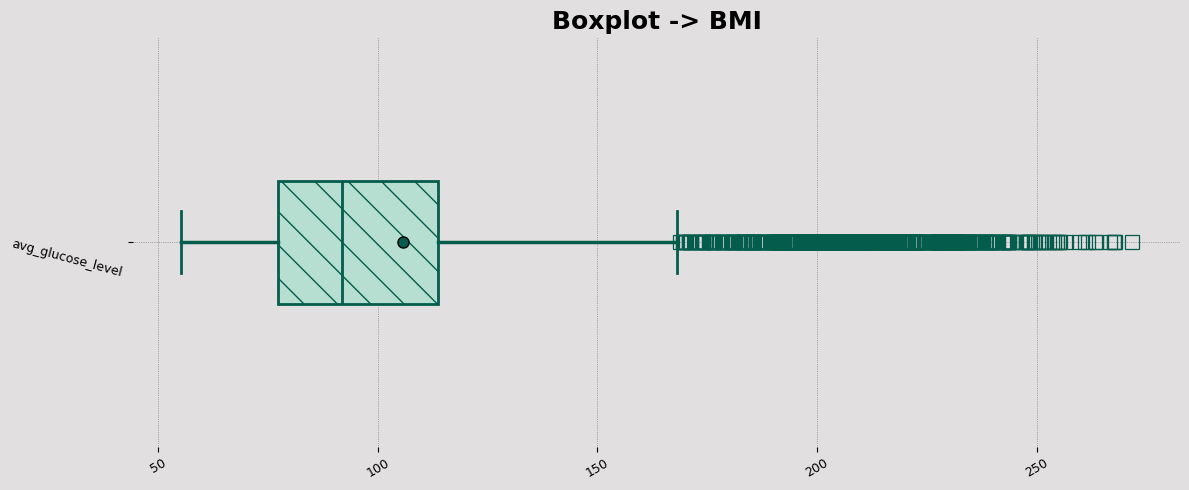

In [71]:
fig, ax = plt.subplots(figsize=(12,5),facecolor="#E1DFDF")
ax.set_facecolor("#E1DFDF")  # Inner graph area ka color
plt.ticklabel_format(style='plain', axis='y')
plt.title('Boxplot -> BMI',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
# plt.xlabel('Bmi Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
# plt.ylabel('Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
bp = plt.boxplot(
    df['avg_glucose_level'],
    tick_labels=["avg_glucose_level"],
    widths=0.3,
    showmeans=True,
    vert=False,
    patch_artist=True,
    boxprops={'edgecolor':"#045C4CFF", 'linewidth':2, 'linestyle':':'},  # edgecolor instead of color
    capprops={'color':"#045C4CFF", 'linewidth':2},
    whiskerprops={'color':"#045C4CFF", 'linewidth':2.5},
    flierprops={'marker':'s','markeredgecolor':'#045C4CFF','markeredgewidth':0.9,'markersize':10},
    meanprops={'marker':'o','markerfacecolor':'#045C4CFF','markeredgecolor':'black','markersize':8},
    medianprops={'color':'#045C4CFF', 'linewidth':2},  # median line color + width
)

for box in bp['boxes']:
    box.set_facecolor("#B6DFD1")  # fill color
    box.set_hatch("\\")            # hatch pattern
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine(top=True, right=True, left=True, bottom=True, trim=True)
plt.tight_layout()
plt.show()

There are many outliers in the avg_glucose_level column, but we cannot remove them because this is a healthcare dataset. Removing these values would lead to the loss of important records of patients with high sugar levels.

In [72]:
#                                         Column Increasing.........
print('Shape of Data before addition of extra column : ',df.shape)

Shape of Data before addition of extra column :  (4941, 12)


In [73]:
df['is_hypertension'] = df['hypertension'].apply(lambda x: 'No' if x == 0 else 'Yes')
df['is_heart_disease'] = df['heart_disease'].apply(lambda x: 'No' if x == 0 else 'Yes')
df['is_stroke'] = df['stroke'].apply(lambda x: 'No' if x == 0 else 'Yes')
print('Shape of Data before addition of extra column : ',df.shape)

Shape of Data before addition of extra column :  (4941, 15)


In [74]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'is_hypertension', 'is_heart_disease',
       'is_stroke'],
      dtype='object')


In [75]:
# Checking
df[['hypertension','is_hypertension','heart_disease','is_heart_disease','stroke','is_stroke']].head(5)

,hypertension,is_hypertension,heart_disease,is_heart_disease,stroke,is_stroke
0,0,No,1,Yes,1,Yes
1,0,No,0,No,1,Yes
2,0,No,1,Yes,1,Yes
3,0,No,0,No,1,Yes
4,1,Yes,0,No,1,Yes


## -o) Exploratory Data Analysis (EDA)

## **Questions:**
---


### What is the ratio of survived to not survived passengers?
> Pie plot (Survived and not Survived).



---

### What was the survival rate based on gender?
> Bar plot (Survived Count and Gender).




---



### What was the survival rate based on passenger class (Pclass)?
> Bar plot (Survived Count and Passenger Class).

---



### What was the effect of age on survival?
> Heatmap plot (Age and Survived).


In [76]:
# In order to avoid warnings in the output (Use this library only after completing the whole code)
import warnings
warnings.filterwarnings("ignore")
# matplotlib font warnings specific hide karne ke liye:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

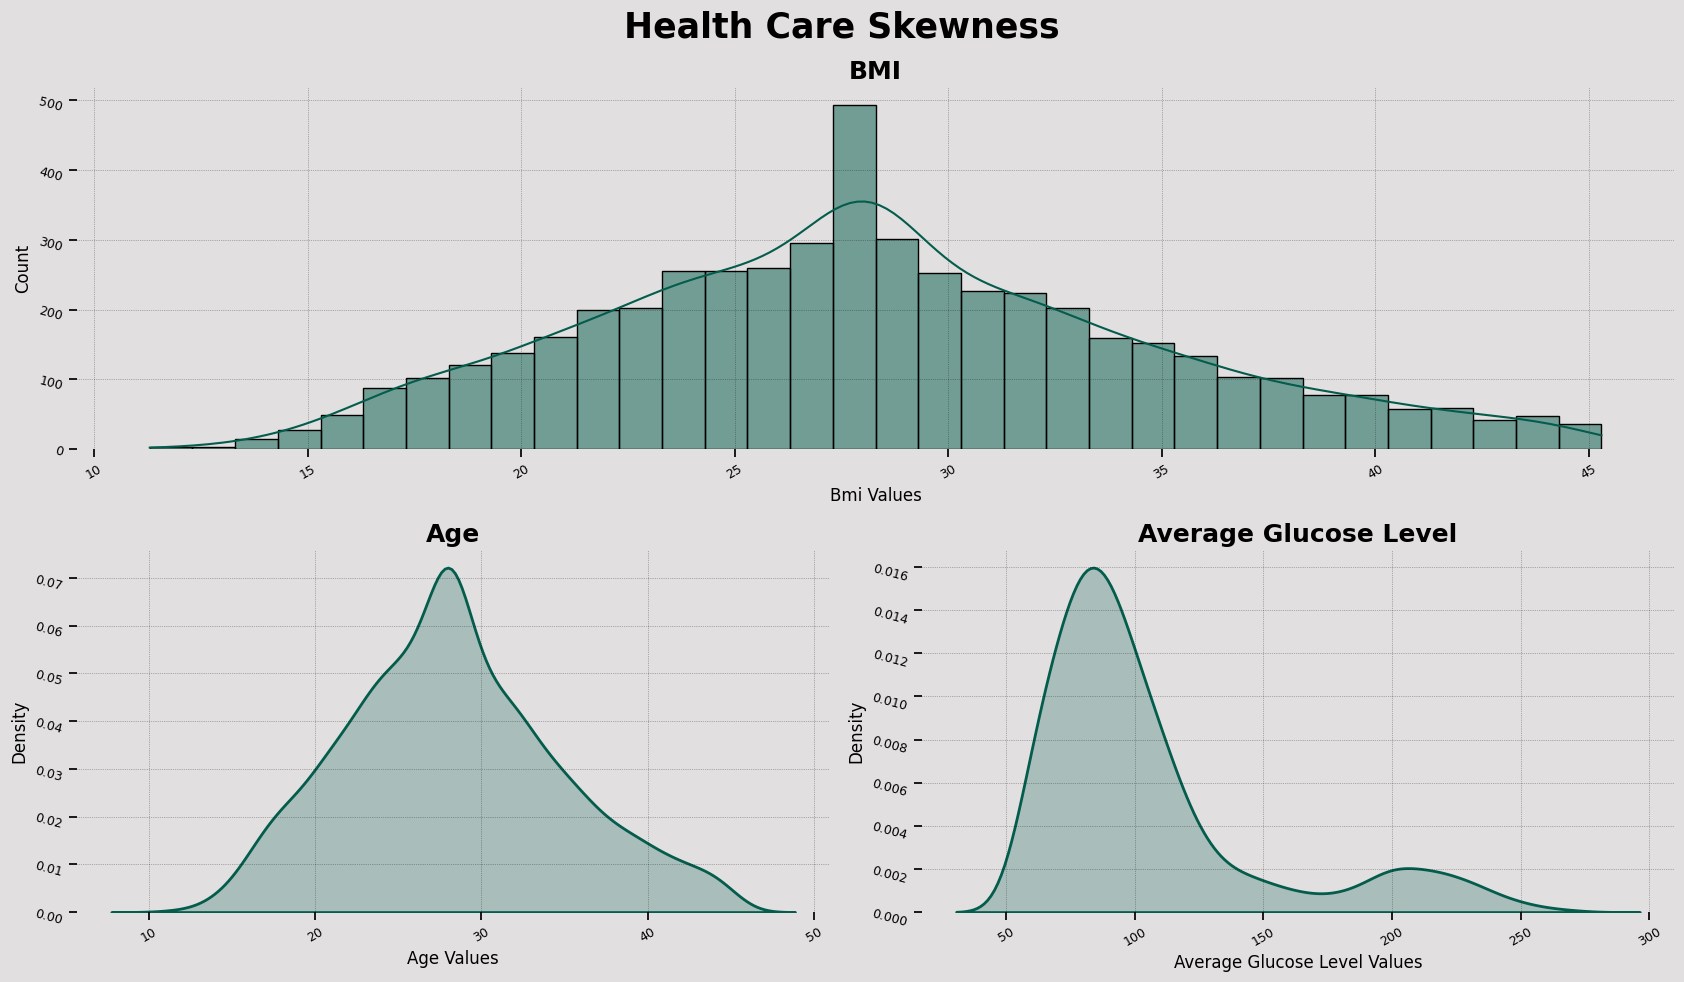

In [88]:
# Data Skewness
plt.figure(figsize=(17, 10), facecolor="#E1DFDF")
sns.set_context('notebook')
plt.suptitle('Health Care Skewness',fontsize = 25,fontweight = 700 , fontfamily = 'cursive')

ax = plt.subplot(2, 2, (1,2))
ax.set_facecolor("#E1DFDF")
plt.ticklabel_format(style='plain', axis='y')
plt.title('BMI',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
plt.xlabel('Bmi Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
plt.ylabel('Count',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
sns.histplot(data=df , x = 'bmi', kde = True , color = "#045C4CFF" , alpha = 0.5)
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine(top=True, right=True, left=True, bottom=True, trim=False)
plt.tight_layout()


ax = plt.subplot(2, 2, 3)
ax.set_facecolor("#E1DFDF")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Age',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
plt.xlabel('Age Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
sns.kdeplot(data=df, x='bmi', color='#045C4CFF', linewidth=2,fill=True)
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine(top=True, right=True, left=True, bottom=True, trim=False)
plt.tight_layout()

# Average Glucose Level
ax = plt.subplot(2, 2, 4)
ax.set_facecolor("#E1DFDF")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average Glucose Level',fontsize = 18 , fontweight = 600 , fontfamily = 'cursive')
plt.xlabel('Average Glucose Level Values',fontsize = 12 , fontweight = 500 ,fontfamily = 'cursive', color = "#000000")
sns.kdeplot(data=df, x='avg_glucose_level', color='#045C4CFF', linewidth=2,fill=True)
plt.xticks(rotation = 30,fontfamily='cursive',fontsize = 9)
plt.yticks(rotation = -15,fontfamily='cursive',fontsize = 9)
plt.grid(linestyle = ":" , linewidth = 0.5 , color = 'black' , alpha = 0.5)
sns.despine(top=True, right=True, left=True, bottom=True, trim=False)
plt.tight_layout()

plt.show()